In [1]:
import matplotlib
import matplotlib.pyplot as plt
from pylab import *
from math import *
import pandas as pd
import xlrd
from netCDF4 import Dataset
import numpy as np

In [65]:
#import data
book=pd.read_excel('data/AWS.xlsx')
book.head()

,No,Jam,Temp,Kec,Arah,Hum,Tek
0,1,12:00:00,32,0.4,WNW,44,927.9
1,2,12:05:00,33,0.9,SE,40,927.9
2,3,12:10:00,32,1.8,SSW,41,927.7
3,4,12:15:00,33,0.4,SSW,41,927.7
4,5,12:20:00,33,0.0,SW,39,927.6


In [45]:
kec = book['Kec']
jam = book['Jam'].astype(str).str[0:5]
jam.head()

0    12:00
1    12:05
2    12:10
3    12:15
4    12:20
Name: Jam, dtype: object

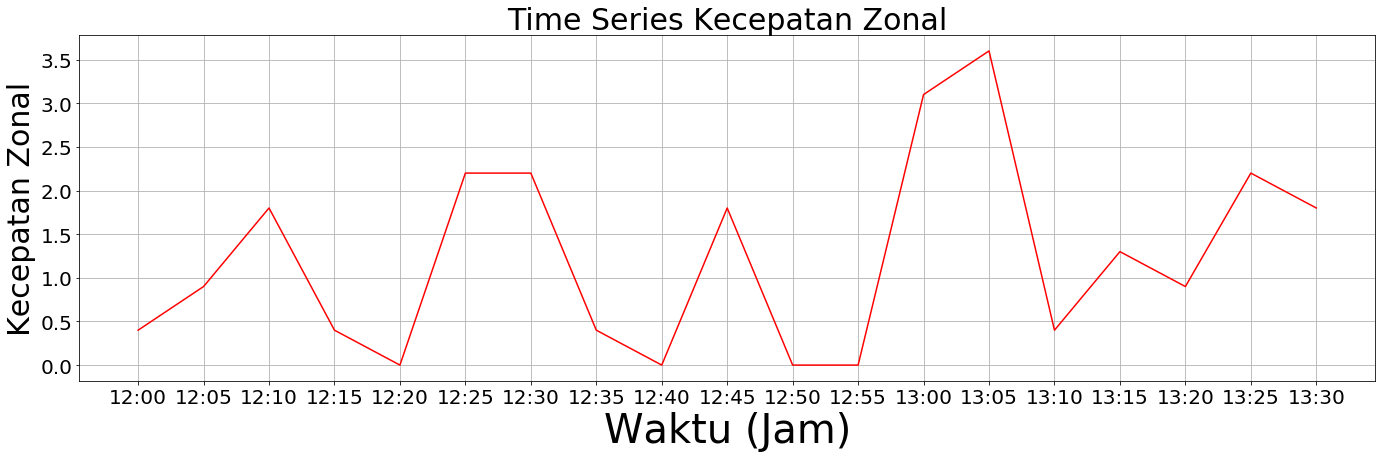

In [66]:
fig1 = plt.figure()
ax = fig1.add_axes([0, 0, 3, 1.2])

ax.plot(jam, kec, 'r')
ax.set_xlabel('Waktu (Jam)', fontsize = 40)
ax.set_ylabel('Kecepatan Zonal', fontsize = 30)
ax.set_title('Time Series Kecepatan Zonal', fontsize = 30)
ax.tick_params(labelsize = 20)
ax.set_xticks(jam)
ax.grid(True)
fig1.savefig('hasil/Time Series Kecepatan Zonal.jpg',bbox_inches='tight')

In [52]:
#import kadar co2 di sekitar lapangan gasibu
pinggir=pd.read_excel('data pinggir.xlsx')
pasar=pd.read_excel('data pasar.xlsx')
kaping=pinggir['kadar (ppm)']
kapas=pasar['kadar']
pusat = [0 for x in range(0,19)]

In [50]:
#membuat array baru sesuai kedaan
keping=pinggir['keadaan ']
kepas=pasar['keadaan']
keping[11]='aga ramai'
kepas[0]='ramai'

lancar =[nan for x in range(0,19)] #lancar
seram =[nan for x in range(0,19)] #sedikit ramai
ramai = [nan for x in range(0,19)] #ramai
secet = [nan for x in range(0,19)] #sedikit macet
lancarpas =[nan for x in range(0,19)] #sedikit ramai untuk wilayah dekat pasar
ramaipas = [nan for x in range(0,19)] #ramai untuk wilayah dekat pasar
macet = [nan for x in range(0,19)] #macet untuk wilayah dekat pasar

#iterasi array baru
for i in range (0,19):
    if (keping[i]=='lancar'):
        lancar[i]=kaping[i]
    if (keping[i]=='aga ramai'):
        seram[i]=kaping[i]
    if (keping[i]=='ramai'):
        ramai[i]=kaping[i]
    if (keping[i]=='agak merayap'):
        secet[i]=kaping[i]
        
    if (kepas[i]==' ga ramai'):
        lancarpas[i]=kapas[i]
    if (kepas[i]==' ramai'):
        ramaipas[i]=kapas[i]
    if (kepas[i]==' macet'):
        macet[i]=kapas[i]

C:\Users\WIN 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
C:\Users\WIN 10\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


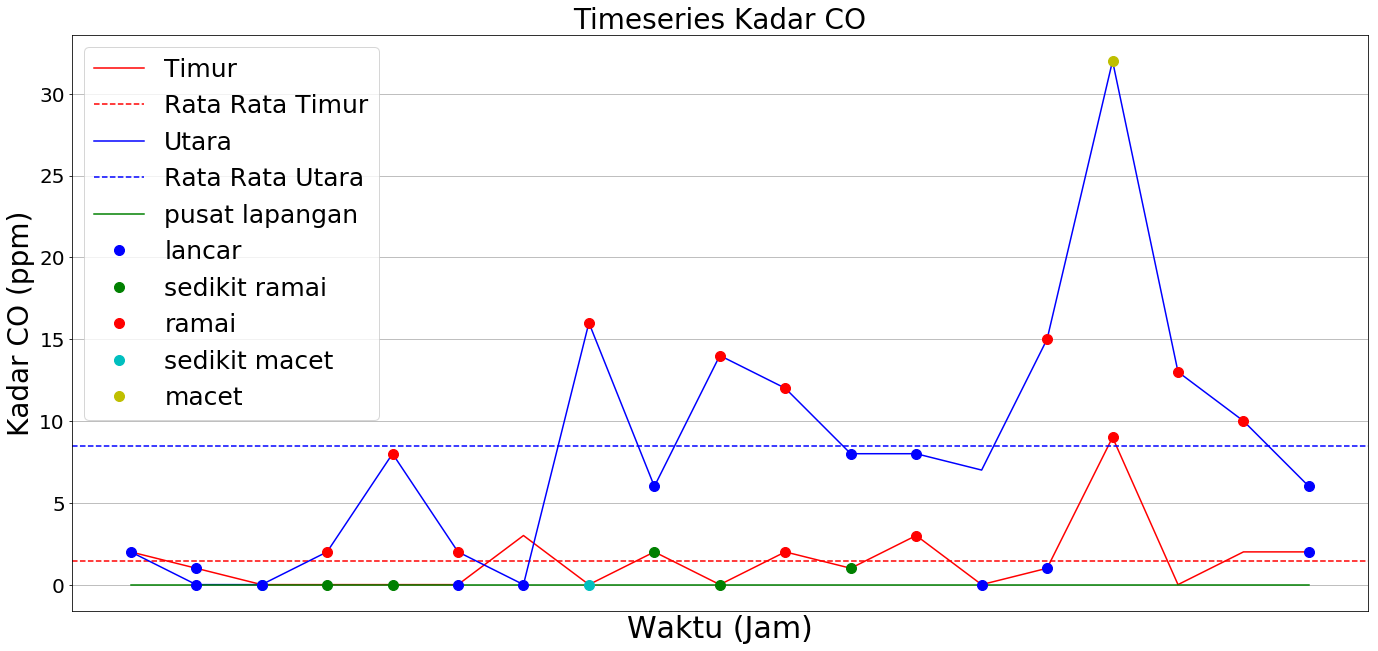

In [67]:
fig2 = plt.figure()
ax1 = fig2.add_axes([0, 0, 3, 2])
ax2 = fig2.add_axes([0, 0, 3, 2])
ax3 = fig2.add_axes([0, 0, 3, 2])
ax4 = fig2.add_axes([0, 0, 3, 2])
ax5 = fig2.add_axes([0, 0, 3, 2])
ax6 = fig2.add_axes([0, 0, 3, 2])
ax7 = fig2.add_axes([0, 0, 3, 2])
ax8 = fig2.add_axes([0, 0, 3, 2])
ax9 = fig2.add_axes([0, 0, 3, 2])
ax10 = fig2.add_axes([0, 0, 3, 2])

ax1.plot(jam, kaping, 'r')
ax1.axhline(np.average(kaping), color='r', linestyle='--')
ax1.set_xlabel('Waktu (Jam)', fontsize = 30)
ax1.set_ylabel('Kadar CO (ppm)', fontsize = 28)
ax1.set_title('Timeseries Kadar CO', fontsize = 28)
ax1.tick_params(labelsize = 20)
ax1.set_xticks(timex)
ax1.grid(True)

ax2.plot(jam, kapas, 'b')
ax2.axhline(np.average(kapas), color='b', linestyle='--')
ax3.plot(jam, pusat, 'g')

ax4.plot(jam,lancar,'bo', markersize=10)
ax5.plot(jam,seram,'go', markersize=10)
ax6.plot(jam,ramai,'ro',markersize=10)
ax7.plot(jam,secet,'co',markersize=10)
ax9.plot(jam,macet,'yo',markersize=10)
ax9.plot(jam,lancarpas,'bo',markersize=10)
ax10.plot(jam,ramaipas,'ro',markersize=10)

ax2.legend(["Timur", 'Rata Rata Timur', "Utara", 'Rata Rata Utara', "pusat lapangan","lancar", "sedikit ramai", 
            "ramai","sedikit macet","macet"],loc=0,fontsize = 25)
fig2.savefig('hasil/Time Series CO.jpg',bbox_inches='tight')